# **1. Perkenalan Dataset**


1. **Sumber Dataset**:  
   Dataset dapat diperoleh *Kaggle* https://www.kaggle.com/datasets/blastchar/telco-customer-churn


2. **Deskripsi**: Dataset ini berisi data historis pelanggan dari sebuah perusahaan penyedia layanan telekomunikasi (fiktif) untuk menganalisis perilaku pelanggan dan memprediksi kemungkinan mereka akan berhenti berlangganan (Churn) di masa mendatang.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
# 1. Memuat dataset dari sumber publik
data = "/content/dataset_raw.csv"
df = pd.read_csv(data)

# 2. Penanganan awal: Mengubah TotalCharges ke numerik (penting!)
# errors='coerce' akan mengubah data kosong/spasi menjadi NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# 3. Menampilkan informasi struktur data
print(f"Dataset dimuat dengan {df.shape[0]} baris dan {df.shape[1]} kolom.")
display(df.head())

Dataset dimuat dengan 7043 baris dan 21 kolom.


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

/tmp/ipython-input-4113382331.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='viridis')


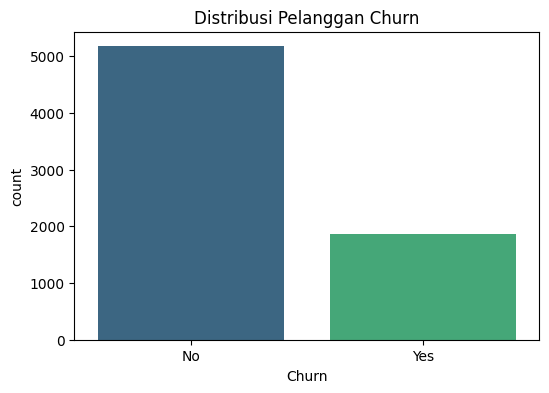


Jumlah Data Kosong per Kolom:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Ringkasan Tipe Data:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
Pap

In [5]:
# Visualisasi distribusi kolom target
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Churn', palette='viridis')
plt.title('Distribusi Pelanggan Churn')
plt.show()

# Mengecek jumlah missing values
print("\nJumlah Data Kosong per Kolom:")
print(df.isnull().sum())

# Mengecek ringkasan tipe data
print("\nRingkasan Tipe Data:")
print(df.dtypes)

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [6]:
def preprocessing(df_raw):
    df = df_raw.copy()

    # 1. Menghapus kolom yang tidak relevan (ID)
    if 'customerID' in df.columns:
        df.drop('customerID', axis=1, inplace=True)

    # 2. Handling Missing Values pada TotalCharges
    # Ubah ke numerik, jika ada spasi kosong jadi NaN
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
    # Hapus baris yang memiliki nilai NaN (hanya sedikit di dataset ini)
    df.dropna(inplace=True)

    # 3. Menghapus Data Duplikat
    df.drop_duplicates(inplace=True)

    # 4. Encoding Data Kategorikal
    # Target 'Churn' diubah jadi 1 dan 0
    if 'Churn' in df.columns:
        df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

    # One-Hot Encoding untuk kolom kategorikal lainnya
    # Kolom SeniorCitizen sudah 0/1, jadi tidak perlu di-encode
    df = pd.get_dummies(df)

    # 5. Normalisasi / Standarisasi Fitur Numerik
    scaler = StandardScaler()
    num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
    df[num_cols] = scaler.fit_transform(df[num_cols])

    return df

df_clean = preprocessing(df)
display(df_clean.head())

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,-1.285566,-1.165523,-0.997284,0,True,False,False,True,True,...,False,True,False,False,False,True,False,False,True,False
1,0,0.060346,-0.264071,-0.176848,0,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,True
2,0,-1.244781,-0.367189,-0.962740,1,False,True,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,0,0.508983,-0.751387,-0.198355,0,False,True,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,0,-1.244781,0.193308,-0.943549,1,True,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False
